In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import csv file
df = pd.read_csv("C:\\Users\\alokk\\Diwali Sales Data.csv", encoding= 'unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
df.isnull().sum()/len(df) * 100

User_ID             0.000000
Cust_name           0.000000
Product_ID          0.000000
Gender              0.000000
Age Group           0.000000
Age                 0.000000
Marital_Status      0.000000
State               0.000000
Zone                0.000000
Occupation          0.000000
Product_Category    0.000000
Orders              0.000000
Amount              0.106657
dtype: float64

In [7]:
df.drop(columns=["Status","unnamed1"],axis=1,inplace=True)

In [9]:
# drop null values
df.dropna(inplace=True)

In [10]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Categorical columns

In [11]:
all_columns = ["Gender", "Age Group", "Marital_Status", "Zone","State","Occupation","Product_Category"]

categorical_columns_df = df[all_columns]
for column in categorical_columns_df.columns:
    print("======={}========".format(column))
    print(df[column].value_counts())


=======Gender========
F    7832
M    3407
Name: Gender, dtype: int64
=======Age Group========
26-35    4541
36-45    2283
18-25    1879
46-50     983
51-55     830
55+       427
0-17      296
Name: Age Group, dtype: int64
=======Marital_Status========
0    6518
1    4721
Name: Marital_Status, dtype: int64
=======Zone========
Central     4289
Southern    2693
Western     1952
Northern    1491
Eastern      814
Name: Zone, dtype: int64
=======State========
Uttar Pradesh       1944
Maharashtra         1525
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              427
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: State, dtype: int64
=======Occupation========
IT Sector          1583
Healthcare         1408
Aviation           1310
Banking           

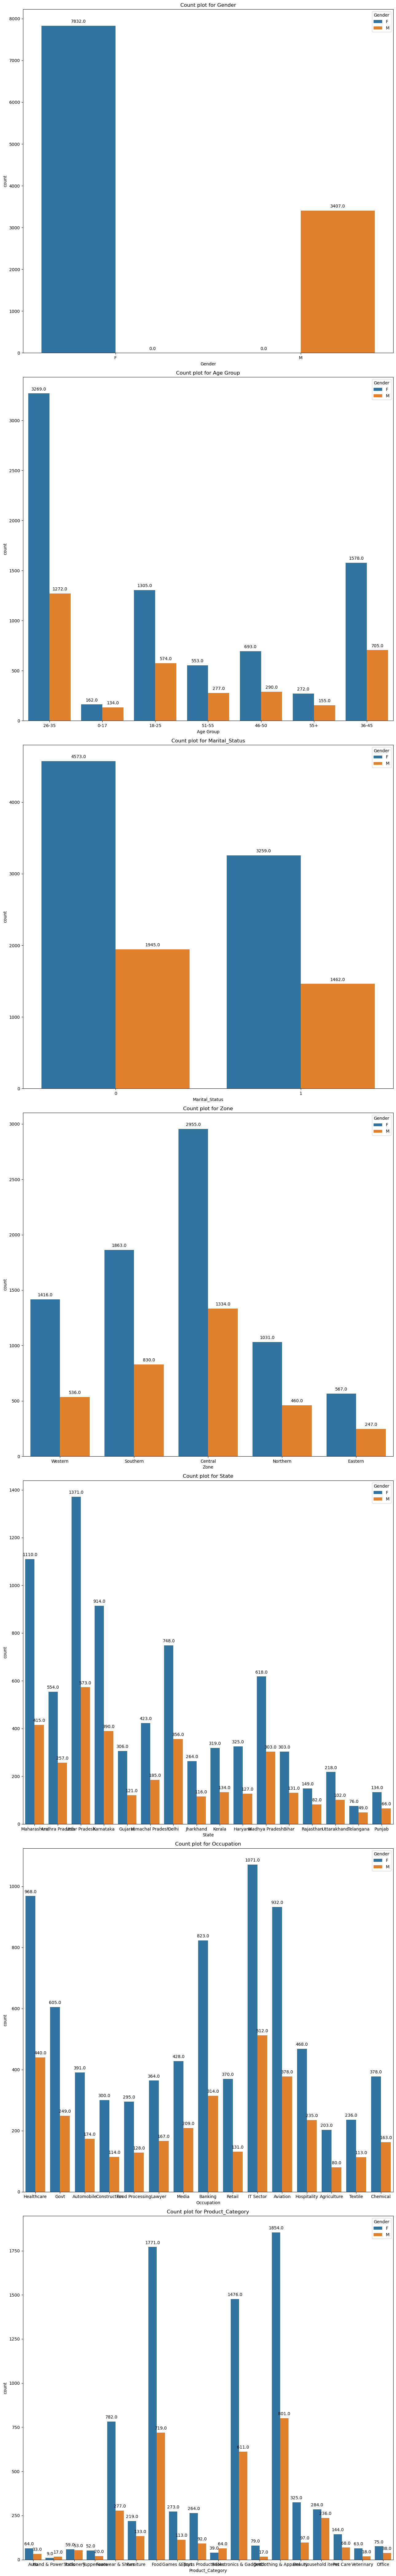

In [13]:
all_columns = ["Gender", "Age Group", "Marital_Status", "Zone","State","Occupation","Product_Category"]

# Set up subplots
fig, axes = plt.subplots(nrows=len(all_columns), figsize=(13, 12 * len(all_columns)))

# Iterate through columns and create count plots
for i, column in enumerate(all_columns):
    sns.countplot(data=df, x=column, ax=axes[i], hue="Gender")

    # Add labels for each bar (Males and Females)
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    axes[i].set_title(f"Count plot for {column}")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


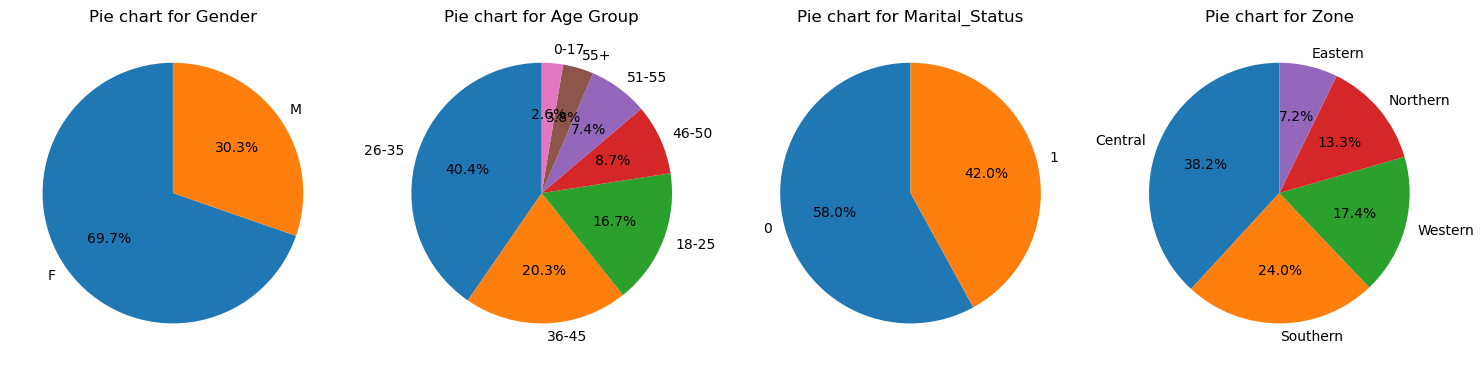

In [18]:
# Select the columns of interest
all_columns = ["Gender", "Age Group", "Marital_Status", "Zone"]

# Set up subplots
fig, axes = plt.subplots(1, len(all_columns), figsize=(15, 5))

# Iterate through columns and create pie charts
for i, column in enumerate(all_columns):
    counts = df[column].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Pie chart for {column}")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Numerical columns

In [16]:
numerical_columns_df = df.select_dtypes(include=["int", "float64"])

# Iterate through numerical columns and print value counts
for column in numerical_columns_df.columns:
    print("======={}========".format(column))
    print(df[column].value_counts())


=======User_ID========
1001680    24
1003808    23
1001941    22
1004425    20
1004682    19
           ..
1003755     1
1000143     1
1002307     1
1003671     1
1005258     1
Name: User_ID, Length: 3752, dtype: int64
=======Age========
30    522
26    494
28    460
29    454
31    448
     ... 
80      8
92      7
70      7
59      7
62      5
Name: Age, Length: 81, dtype: int64
=======Marital_Status========
0    6518
1    4721
Name: Marital_Status, dtype: int64
=======Orders========
2    2893
1    2808
4    2773
3    2765
Name: Orders, dtype: int64
=======Amount========
7907.0     11
7956.0     10
7086.0      9
6923.0      8
7037.0      8
           ..
12078.0     1
12079.0     1
12082.0     1
12083.0     1
188.0       1
Name: Amount, Length: 6584, dtype: int64


In [17]:
all_columns = ["Age", "Orders","Amount"]
numerical_columns_df = df[all_columns].describe()
numerical_columns_df

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


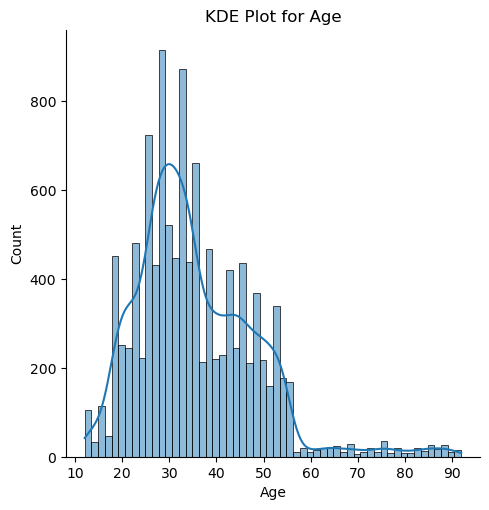

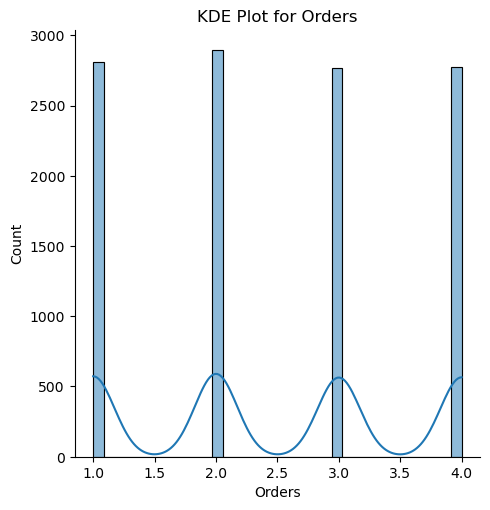

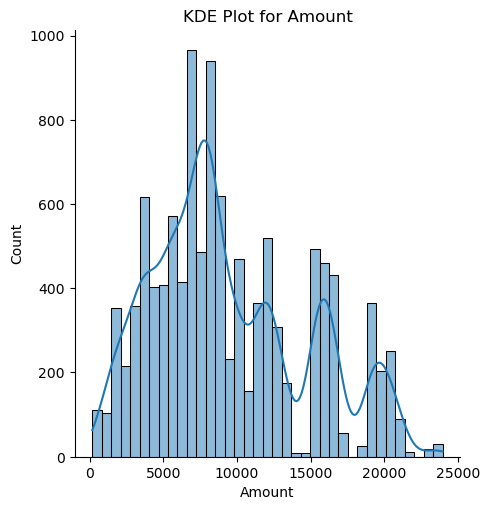

In [18]:
all_columns = ["Age", "Orders","Amount"]
numerical_columns_df = df[all_columns]

# Create separate KDE plots for each numerical column
for column in numerical_columns_df.columns:
    sns.displot(numerical_columns_df[column], kde=True)
    plt.title(f"KDE Plot for {column}")
    plt.show()

In [19]:
all_columns = ["Age", "Orders","Amount"]

# Create a DataFrame with selected columns
numerical_columns_df = df[all_columns].skew()
numerical_columns_df

Age       1.185478
Orders    0.019284
Amount    0.558026
dtype: float64

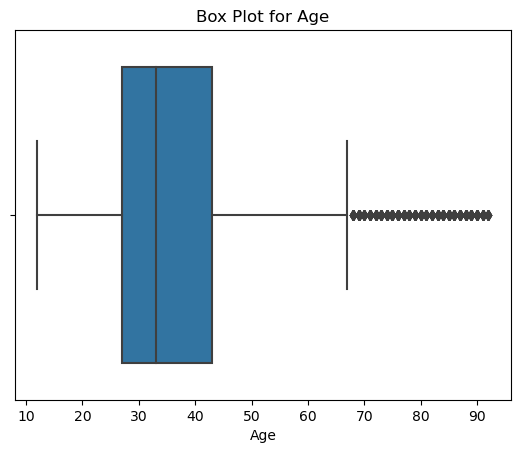

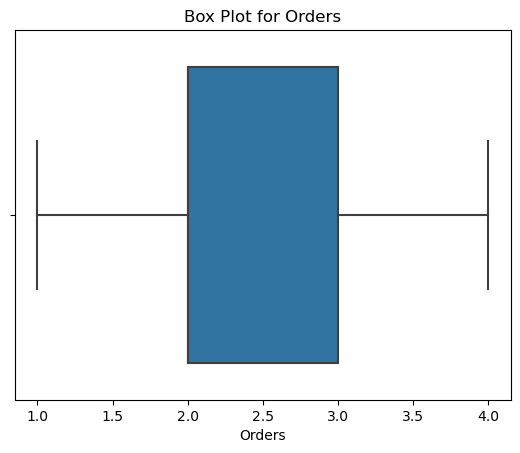

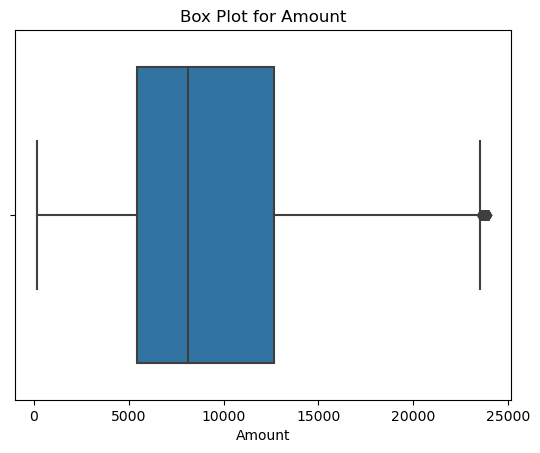

In [20]:
all_columns = ["Age", "Orders","Amount"]

# Create a DataFrame with selected columns
numerical_columns_df = df[all_columns]

# Create separate box plots for each numerical column
for column in numerical_columns_df.columns:
    sns.boxplot(x=numerical_columns_df[column])
    plt.title(f"Box Plot for {column}")
    plt.show()

In [46]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Gender & Amount

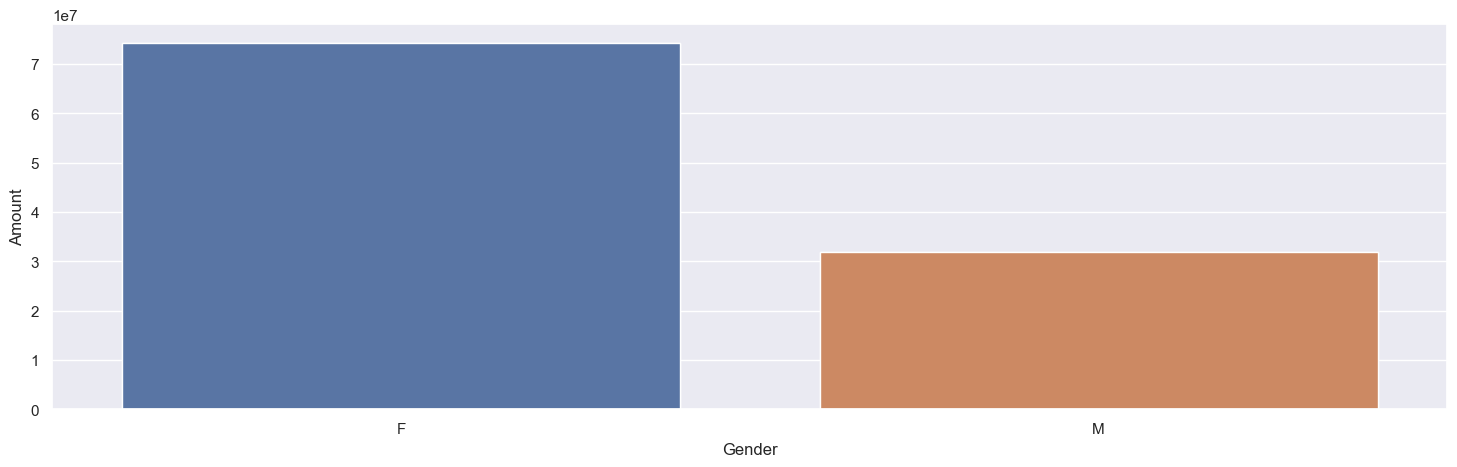

In [49]:
# Checking order placement data for potential patterns or trends in purchasing power across genders
sales_gen = df.groupby(["Gender"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False)

ax = sns.barplot(x = "Gender", y = "Amount", data = sales_gen)

ax = sns.barplot(x="Gender", y="Amount", data=sales_gen)
plt.show()

Age Group & Amount

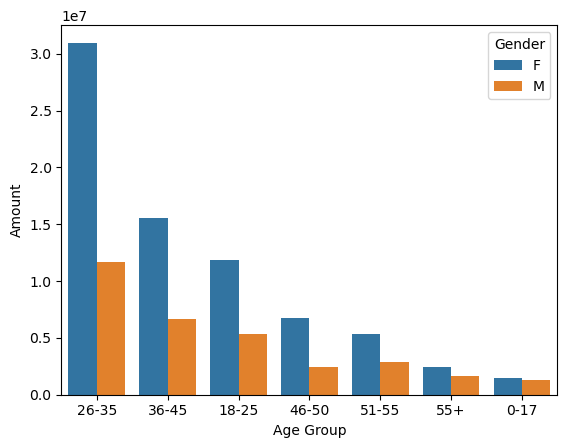

In [38]:
# Checking order placement data for potential patterns or trends in purchasing power across genders
sales_gen = df.groupby(["Age Group", "Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x="Age Group", y="Amount", hue="Gender", data=sales_gen)
plt.show()


Oredr and State

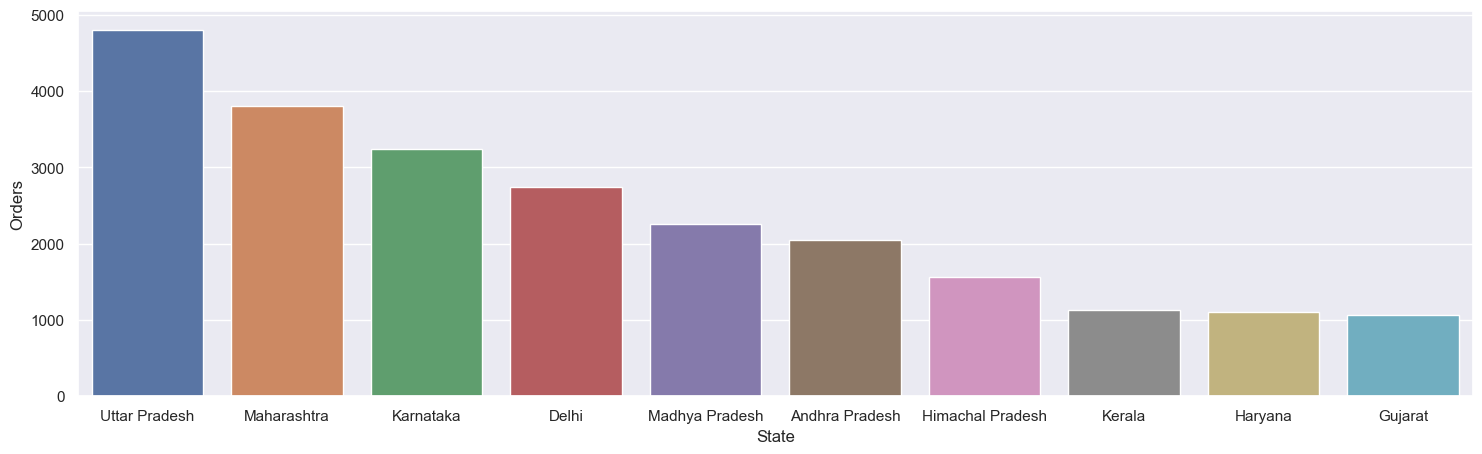

In [55]:
# Checking total number of orders from top 10 states 
sales_state = df.groupby(["State"], as_index = False) ["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)

sns.set(rc={"figure.figsize":(18,5)})
ax = sns.barplot(x = "State", y = "Orders", data = sales_state)

State & Amount

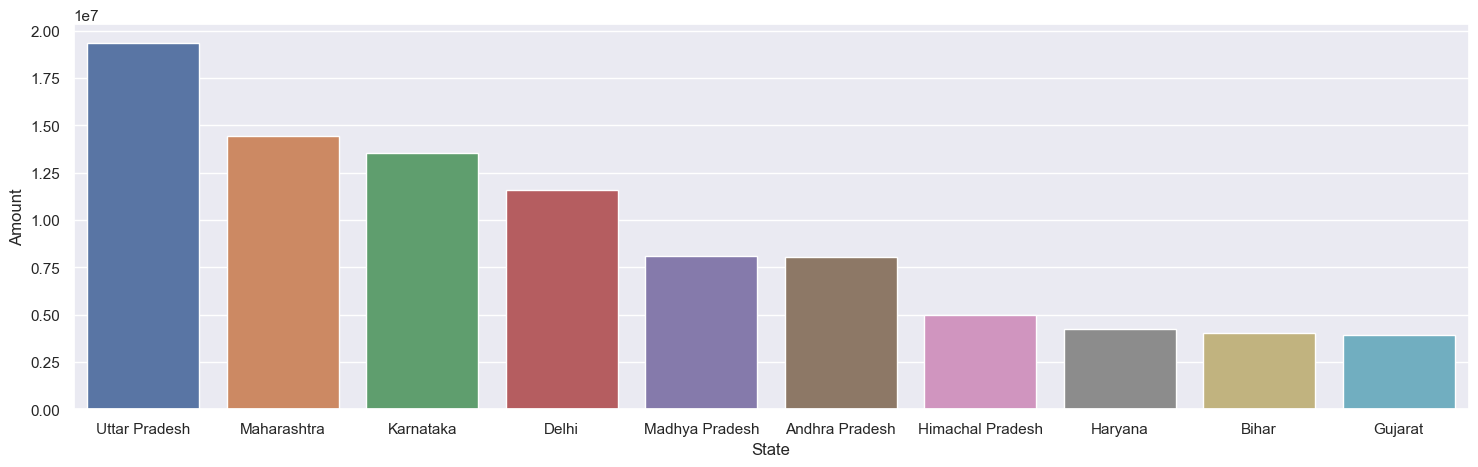

In [42]:
# Checking top 10 states based on Amount spent
sales_state = df.groupby(["State"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

sns.set(rc={"figure.figsize":(18,5)})
ax = sns.barplot(x = "State", y = "Amount", data = sales_state)

Marital_Status  and Amount

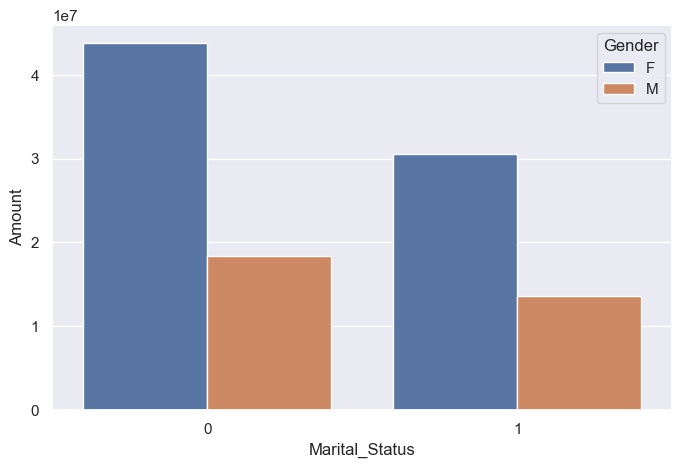

In [59]:
# Checking the pattern of Amount spent based on relationship status and gender
sales_state = df.groupby(["Marital_Status", "Gender"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.set(rc={"figure.figsize":(8,5)})
ax = sns.barplot(x = "Marital_Status", y = "Amount", data = sales_state, hue = "Gender")


Ocupation and Amount

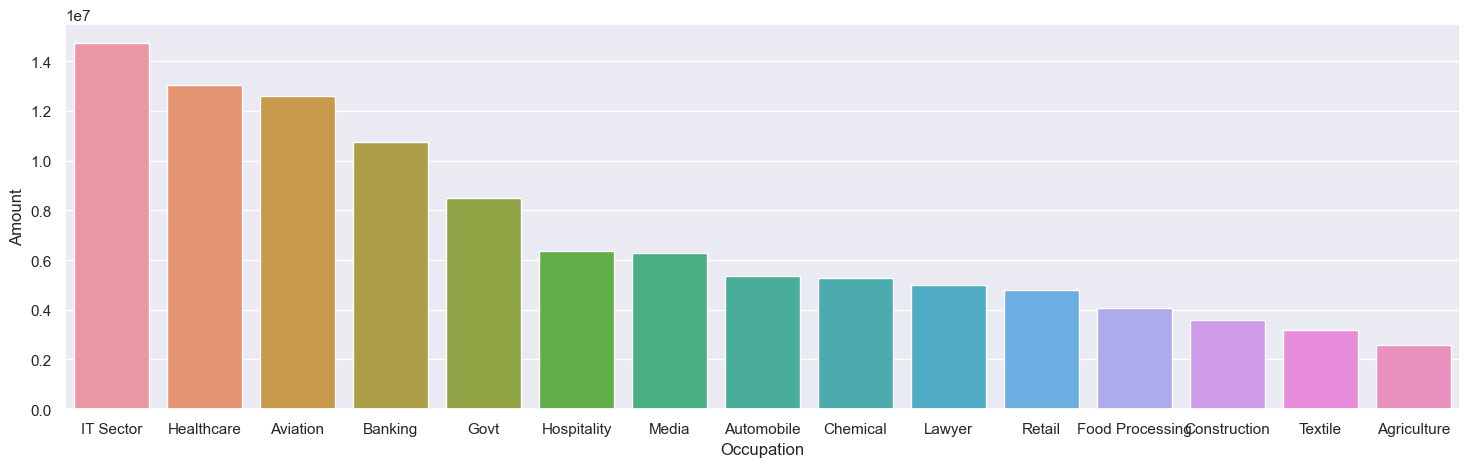

In [61]:
# Checking the pattern of Amount spent based on Occupation
sales_state = df.groupby(["Occupation"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.set(rc={"figure.figsize":(18,5)})
ax = sns.barplot(x = "Occupation", y = "Amount", data = sales_state)

Prouduct categories and Amount

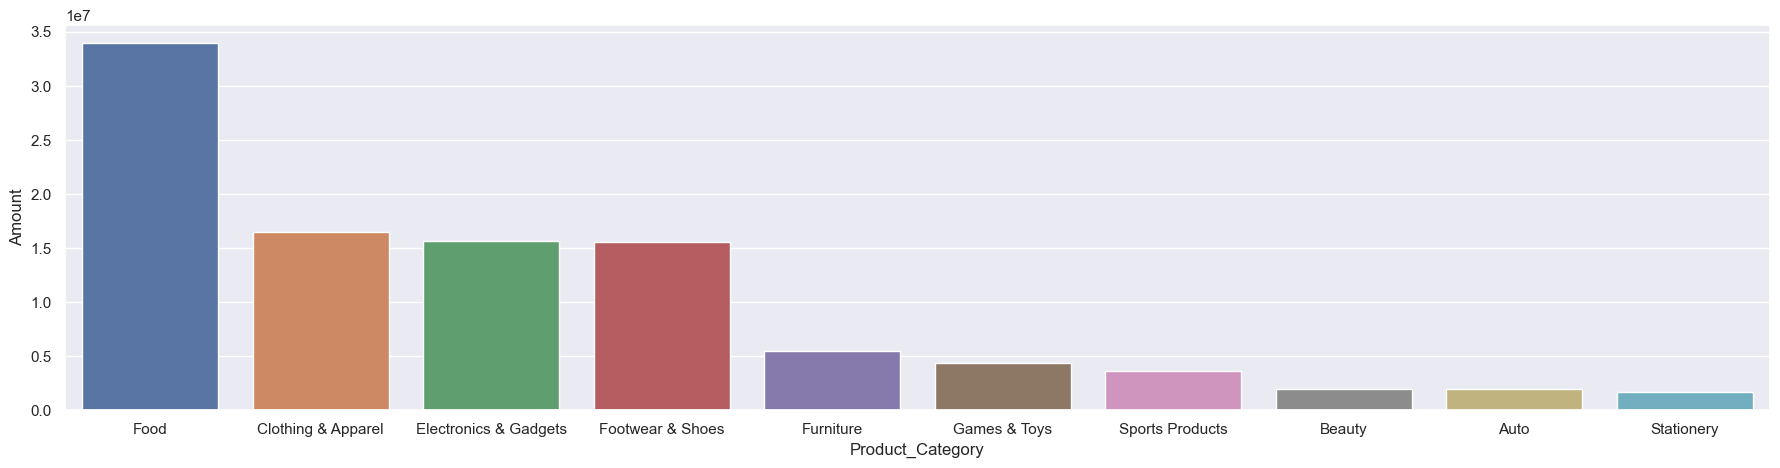

In [62]:
# Checking the pattern of Amount spent based on Product_Category
sales_state = df.groupby(["Product_Category"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

sns.set(rc={"figure.figsize":(22,5)})
ax = sns.barplot(x = "Product_Category", y = "Amount", data = sales_state)


Prouduct and Order

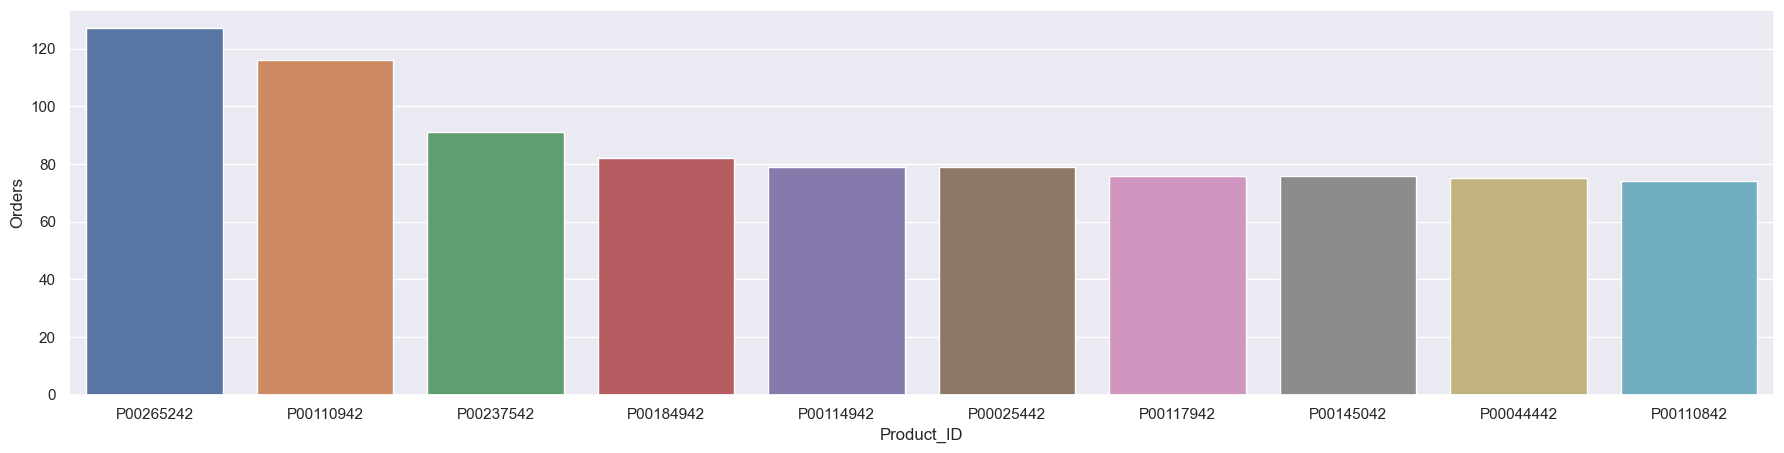

In [63]:
# Checking the top 10 soled products based on Product_ID
sales_state = df.groupby(["Product_ID"], as_index = False) ["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)

sns.set(rc={"figure.figsize":(22,5)})
ax = sns.barplot(x = "Product_ID", y = "Orders", data = sales_state)

## Conclusion
- Gender: The dataset indicates a higher representation of females, with 7832 individuals, suggesting a significant presence of women in the observed sample.
- Age Group: The predominant age group in the dataset is (26-35), with 4541 individuals falling within this range. This suggests that individuals aged between 26 and 35 are more prevalent in the dataset.
- Marital Status: The majority of individuals in the dataset are non-married, totaling 6518. This implies a higher proportion of single individuals in the observed sample.
- Zone: The data highlights a higher representation of people from the Central Zone (4289) compared to other zones. This geographical distribution may have implications for further analysis or targeted interventions in this specific zone.
- State: Uttar Pradesh stands out with the highest representation in the dataset, having 1944 individuals, while Telangana has the lowest representation with 125 individuals. This state-wise distribution provides insights into the regional diversity of the dataset.
- Occupation: The IT sector is predominant in the dataset, with 1583 individuals, while the Agriculture sector has the lowest representation with 283 individuals. This highlights the occupational diversity within the observed sample.
- Product_Category: Clothing & Apparel is the dominant product category, with 2655 individuals, whereas Hand & Power Tools have the lowest representation with 26 individuals. This emphasizes the popularity or prevalence of certain product categories within the dataset.
#### Overall:- The dataset analysis highlights that females outspend males, the 26-35 age group contributes the most, singles spend more than married individuals, and food is the top-selling product category followed by Cloth & Apparel and Electronic & Gadgets. Businesses should consider these insights to tailor their strategies for better targeting and revenue optimization.

## Project Learnings
- Executed data cleaning and manipulation procedures.
- Conducted exploratory data analysis (EDA) utilizing the pandas, matplotlib, and seaborn libraries.
- Enhanced the customer experience by identifying prospective customers among diverse states, occupations, genders, and age groups.
- Boosted sales by identifying the highest selling product categories and products, thereby facilitating inventory planning to meet demand.